## 1. Import important libraries

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

## 2. Import Flower datasets from google and save it

In [6]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir="D:\Akash\Machine Learning\Data_for_ML", untar=True)

228818944/228813984 [==============================] - 121s 1us/step


## 3. Data Visualization and processing

In [7]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('D:/Akash/Machine Learning/Data_for_ML/datasets/flower_photos')

In [8]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [16]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}


flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [17]:
flowers_images_dict['roses'][:5]

[WindowsPath('D:/Akash/Machine Learning/Data_for_ML/datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('D:/Akash/Machine Learning/Data_for_ML/datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('D:/Akash/Machine Learning/Data_for_ML/datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('D:/Akash/Machine Learning/Data_for_ML/datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('D:/Akash/Machine Learning/Data_for_ML/datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

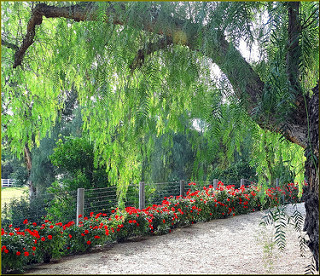

In [19]:
PIL.Image.open(flowers_images_dict['roses'][5])

In [21]:
# Convert image into numpy array
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img

array([[[ 0, 15,  6],
        [ 0, 15,  6],
        [ 0, 17,  8],
        ...,
        [24, 51, 31],
        [25, 52, 32],
        [26, 53, 33]],

       [[ 7, 22, 14],
        [ 7, 22, 14],
        [ 6, 21, 13],
        ...,
        [20, 46, 30],
        [23, 49, 33],
        [25, 51, 35]],

       [[12, 23, 15],
        [12, 23, 15],
        [11, 22, 14],
        ...,
        [20, 42, 30],
        [23, 45, 33],
        [26, 48, 36]],

       ...,

       [[19, 30, 27],
        [14, 24, 18],
        [12, 20, 13],
        ...,
        [ 4, 13,  3],
        [ 0,  8,  1],
        [ 0,  5,  0]],

       [[19, 30, 28],
        [18, 27, 24],
        [15, 23, 16],
        ...,
        [ 3, 12,  2],
        [ 1,  9,  2],
        [ 0,  7,  2]],

       [[ 9, 19, 19],
        [17, 25, 24],
        [22, 29, 24],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 11,  4]]], dtype=uint8)

In [22]:
img.shape

(240, 179, 3)

In [23]:
cv2.resize(img , (180,180)).shape

(180, 180, 3)

In [25]:
# do above thing to all the images and make a list
x , y = [] , []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        x.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

# convert list into numpy array 
x = np.array(x)
y = np.array(y)

## 4. Train Test Splitting of datasets

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

## 5. scaling of 'x' datasets

In [31]:
x_train_scaled = x_train / 255
x_test_scaled = x_test / 255

# 6. Build CNN model and train it 

** without using data augmentation there might be overfitting **

## Data Augmentation

In [35]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(180,180,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

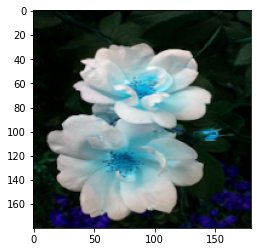

In [41]:
# original image
plt.imshow(x[0])

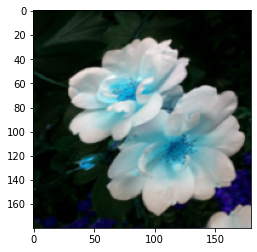

In [42]:
# Augmented image
plt.imshow(data_augmentation(x)[0].numpy().astype("uint8"))

## Train the model using data augmentation and a drop out layer

In [44]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(4, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(6, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(x_train_scaled, y_train, epochs=5)

Epoch 1/5
86/86 [==============================] - 284s 3s/step - loss: 1.3256 - accuracy: 0.4353
Epoch 2/5
86/86 [==============================] - 267s 3s/step - loss: 1.1273 - accuracy: 0.5432
Epoch 3/5
86/86 [==============================] - 179s 2s/step - loss: 1.0469 - accuracy: 0.5908
Epoch 4/5
86/86 [==============================] - 224s 3s/step - loss: 1.0109 - accuracy: 0.6108
Epoch 5/5
86/86 [==============================] - 230s 3s/step - loss: 0.9352 - accuracy: 0.6388


In [46]:
model.evaluate(x_test_scaled,y_test)

29/29 [==============================] - 36s 1s/step - loss: 1.0090 - accuracy: 0.6318


[1.0089887380599976, 0.6318082809448242]

## evaluation Report

In [47]:
y_pred = model.predict(x_test_scaled)
y_pred_classes = [np.argmax(score) for score in tf.nn.softmax(y_pred)]
y_pred_classes[0]

1

In [48]:
y_test[0]

1

In [50]:
from sklearn.metrics import confusion_matrix , classification_report

print("Classification Report \n", classification_report(y_test , y_pred_classes))

Classification Report 
               precision    recall  f1-score   support

           0       0.69      0.41      0.51       176
           1       0.54      0.63      0.58       154
           2       0.74      0.64      0.69       226
           3       0.62      0.83      0.71       150
           4       0.59      0.67      0.63       212

    accuracy                           0.63       918
   macro avg       0.64      0.64      0.62       918
weighted avg       0.64      0.63      0.63       918

